## Matplotlib examples 

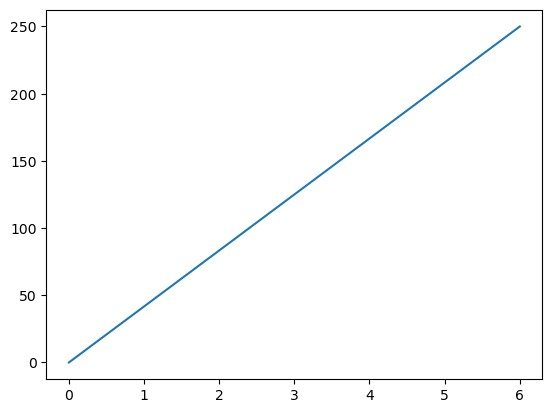

In [11]:
import matplotlib.pyplot as plt
import numpy as np

xpoints = np.array([0, 6])
ypoints = np.array([0, 250])

plt.plot(xpoints, ypoints)
plt.show()

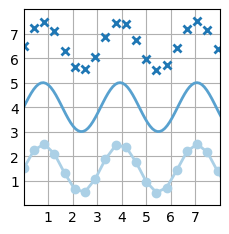

In [3]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('_mpl-gallery')

# make data
x = np.linspace(0, 10, 100)
y = 4 + 1 * np.sin(2 * x)
x2 = np.linspace(0, 10, 25)
y2 = 4 + 1 * np.sin(2 * x2)

# plot
fig, ax = plt.subplots()

ax.plot(x2, y2 + 2.5, 'x', markeredgewidth=2)
ax.plot(x, y, linewidth=2.0)
ax.plot(x2, y2 - 2.5, 'o-', linewidth=2)

ax.set(xlim=(0, 8), xticks=np.arange(1, 8),
       ylim=(0, 8), yticks=np.arange(1, 8))

plt.show()

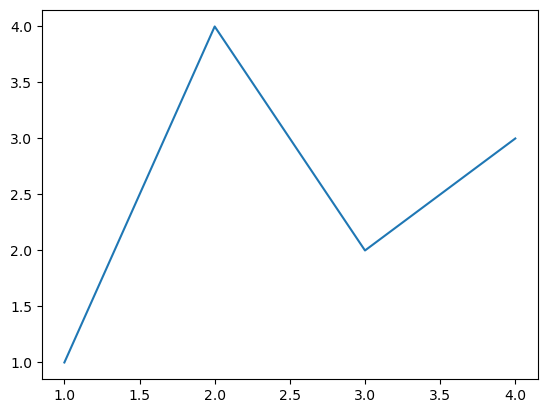

In [13]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots()             # Create a figure containing a single Axes.
ax.plot([1, 2, 3, 4], [1, 4, 2, 3])  # Plot some data on the Axes.
plt.show()      

In [15]:
b = np.matrix([[1, 2], [3, 4]])
b_asarray = np.asarray(b)

Text(0, 0.5, 'entry b')

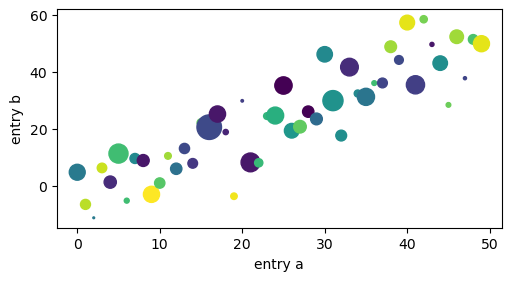

In [17]:
np.random.seed(19680801)  # seed the random number generator.
data = {'a': np.arange(50),
        'c': np.random.randint(0, 50, 50),
        'd': np.random.randn(50)}
data['b'] = data['a'] + 10 * np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

fig, ax = plt.subplots(figsize=(5, 2.7), layout='constrained')
ax.scatter('a', 'b', c='c', s='d', data=data)
ax.set_xlabel('entry a')
ax.set_ylabel('entry b')

25-ci percentil (Q1): 3475.0
75-ci percentil (Q3): 4125.0
IQR: 650.0
Outlier sərhədləri: 2500.0 - 5100.0
Tapılan Outlier-lər: [12000]


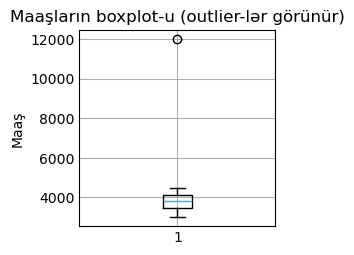

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Random maaş məlumatları
maaslar = np.array([3000, 3200, 3400, 3500, 3600, 3700, 3900, 4000, 4100, 4200, 4500, 12000])

# 25-ci və 75-ci percentilləri (q1 və q3)
q1 = np.percentile(maaslar, 25)
q3 = np.percentile(maaslar, 75)
iqr = q3 - q1  # Interquartile Range

# Aşağı və yuxarı sərhədlər
alt_serhed = q1 - 1.5 * iqr
ust_serhed = q3 + 1.5 * iqr

# Outlier-ləri tapırıq
outliers = maaslar[(maaslar < alt_serhed) | (maaslar > ust_serhed)]

print("25-ci percentil (Q1):", q1)
print("75-ci percentil (Q3):", q3)
print("IQR:", iqr)
print("Outlier sərhədləri:", alt_serhed, "-", ust_serhed)
print("Tapılan Outlier-lər:", outliers)

# Vizual göstərək
plt.boxplot(maaslar)
plt.title("Maaşların boxplot-u (outlier-lər görünür)")
plt.ylabel("Maaş")
plt.grid(True)
plt.show()


## Scikit-learn  &  matplotlib 

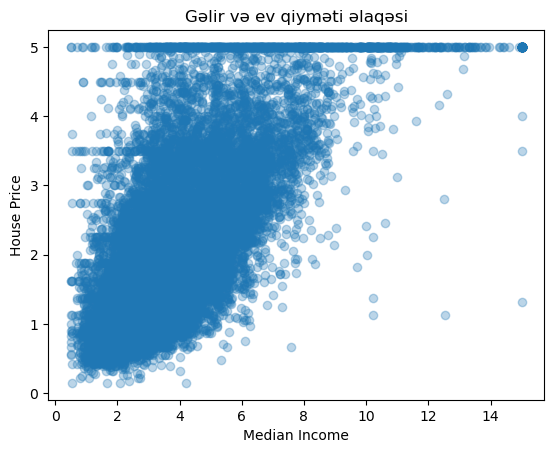

Mean Squared Error: 0.7091157771765549


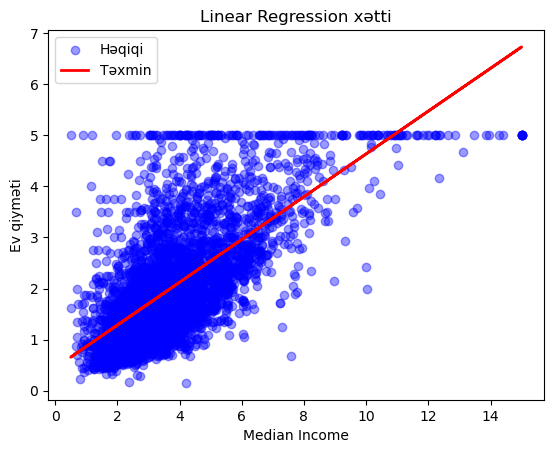

In [19]:
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd

# Dataset yüklenmesi
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Vizualizasiya
plt.scatter(X["MedInc"], y, alpha=0.3)
plt.xlabel("Median Income")
plt.ylabel("House Price")
plt.title("Gəlir və ev qiyməti əlaqəsi")
plt.show()

# Model qurulması
X_train, X_test, y_train, y_test = train_test_split(X[["MedInc"]], y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Qiymetlendirme
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Vizual netice
plt.scatter(X_test, y_test, color='blue', alpha=0.4, label="Həqiqi")
plt.plot(X_test, y_pred, color='red', linewidth=2, label="Təxmin")
plt.xlabel("Median Income")
plt.ylabel("Ev qiyməti")
plt.title("Linear Regression xətti")
plt.legend()
plt.show()



## Sade ML modeli numune (Layihə: Ev sahəsinə görə qiymətin təxmin olunması) Linear Regression 

In [23]:
# Sadə dataset
data = {
    'Sahə': [50, 60, 70, 80, 90, 100, 110],
    'Qiymət': [150, 180, 210, 240, 270, 300, 330]
}

df = pd.DataFrame(data)

# Özəllik və hədəf dəyişənləri
X = df[['Sahə']]     # DataFrame formatında saxlayırıq
y = df['Qiymət']


In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [27]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [29]:
# Yeni ev sahesi ucun texmin
yeni_ev = pd.DataFrame({'Sahə': [85]})
tahmin = model.predict(yeni_ev)

print("85 kv.m ev üçün təxmin qiymət:", tahmin[0], "min $")


85 kv.m ev üçün təxmin qiymət: 255.00000000000003 min $


In [31]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


MSE: 8.077935669463161e-28
R² Score: 1.0


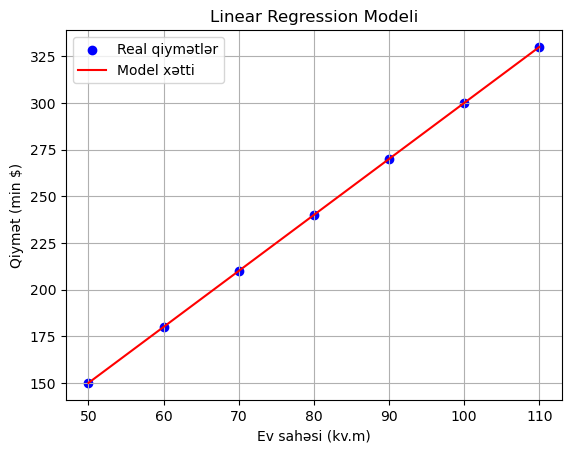

In [41]:
plt.scatter(X, y, color='blue', label='Real qiymətlər')
plt.plot(X, model.predict(X), color='red', label='Model xətti')
plt.xlabel("Ev sahəsi (kv.m)")
plt.ylabel("Qiymət (min $)")
plt.title("Linear Regression Modeli")
plt.legend()
plt.grid(True)
plt.show()


## LOGISTIG REGRESSION EXAMPLE 

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [49]:
from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples=300,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    flip_y=0.1,
    random_state=42
)

df = pd.DataFrame(X, columns=["Feature 1", "Feature 2"])
df["Target"] = y


In [51]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## Train - Test 

In [55]:
model = LogisticRegression()
model.fit(X_train, y_train)
## Modelin qurulmasi 

LogisticRegression()

In [63]:
##  Proqnoz ve  qiymetlendirme

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9
Confusion Matrix:
 [[22  4]
 [ 2 32]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.85      0.88        26
           1       0.89      0.94      0.91        34

    accuracy                           0.90        60
   macro avg       0.90      0.89      0.90        60
weighted avg       0.90      0.90      0.90        60



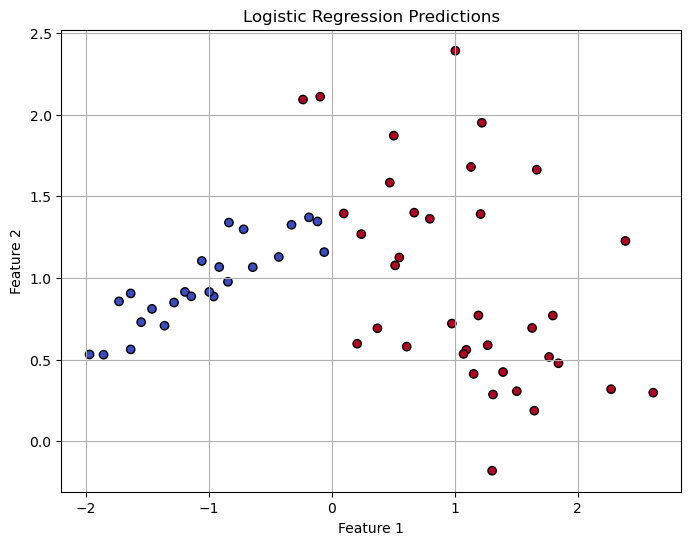

In [72]:
## Vizual analiz

plt.figure(figsize=(8, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='coolwarm', edgecolors='k')
plt.title("Logistic Regression Predictions")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid(True)
plt.show()


## Hazir real  dataset istifade olunarsa 

In [75]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np

# Dataset-i yüklə
data = load_breast_cancer()

# X və y
X = data.data
y = data.target

# DataFrame formatında baxmaq istəsən:
df = pd.DataFrame(X, columns=data.feature_names)
df["Target"] = y

print(df.head())


   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0             

In [84]:
## TRAIN , VALIDATION, TEST  

from sklearn.model_selection import train_test_split

# Əvvəlcə test üçün 20%-i ayır
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Qalan 80%-i validation və train olaraq 75/25 böl (yəni 60% train, 20% val, 20% test)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)


In [88]:
## Logistic Regression ilə model qurmaq:

from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=10000)  # convergence üçün max_iter artırıldı
model.fit(X_train, y_train)


LogisticRegression(max_iter=10000)

In [92]:
## Validation üzərində qiymətləndirmə:

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

y_val_pred = model.predict(X_val)

print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("Validation F1 Score:", f1_score(y_val, y_val_pred))
print("Validation Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))
print("Validation Classification Report:\n", classification_report(y_val, y_val_pred))


Validation Accuracy: 0.9649122807017544
Validation F1 Score: 0.9714285714285714
Validation Confusion Matrix:
 [[42  2]
 [ 2 68]]
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95        44
           1       0.97      0.97      0.97        70

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



In [94]:
##  Test ucun qiymetlendirme

y_test_pred = model.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Test F1 Score:", f1_score(y_test, y_test_pred))


Test Accuracy: 0.9649122807017544
Test F1 Score: 0.9722222222222222


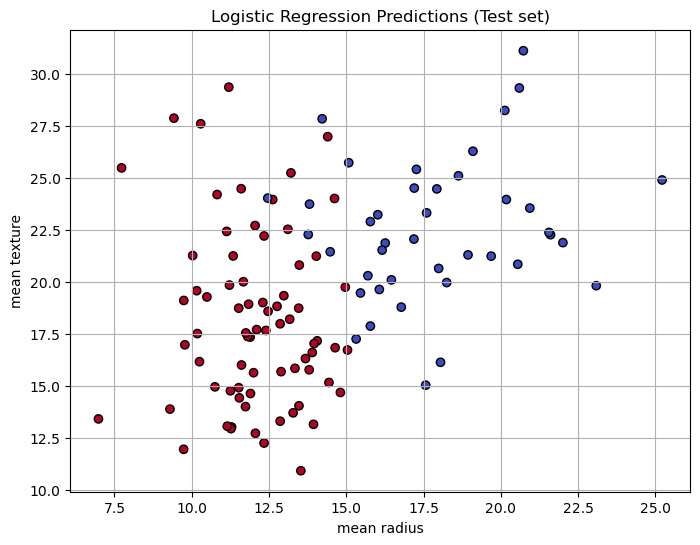

In [98]:
## 2 feature seçib vizuallaşdırmaq (məsələn ilk ikisi):

import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test_pred, cmap='coolwarm', edgecolor='k')
plt.title("Logistic Regression Predictions (Test set)")
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.grid(True)
plt.show()


In [2]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import RandomOverSampler

# 1. Balanssız data yaradaq
X, y = make_classification(
    n_classes=2,
    class_sep=2,
    weights=[0.85, 0.15],  # siniflər arasında balanssızlıq
    n_informative=2,
    n_redundant=0,
    n_clusters_per_class=1,
    n_samples=1000,
    random_state=42
)

print("Əvvəlki sinif bölgüsü:", Counter(y))

# 2. Oversampling tətbiq edək
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

print("Sonrakı sinif bölgüsü:", Counter(y_resampled))


Əvvəlki sinif bölgüsü: Counter({0: 849, 1: 151})
Sonrakı sinif bölgüsü: Counter({0: 849, 1: 849})


## K-Nearest Neighbors (KNN)

In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Dataset
data = load_iris()
X = data.data
y = data.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

# Proqnoz
y_pred = knn.predict(X_test)

# Qiymətləndirmə
print("Doğruluq (accuracy):", accuracy_score(y_test, y_pred))


Doğruluq (accuracy): 1.0


In [12]:
from sklearn.datasets import load_iris

# Load the Iris dataset
flw = load_iris()

# Access the data and target variables
X = iris.data  # Features (sepal length, sepal width, petal length, petal width)
y = iris.target  # Target variable (species: 0 for setosa, 1 for versicolor, 2 for virginica)

# Print feature and target names
print("Feature names:", flw.feature_names)
print("Target names:", flw.target_names)

# Print the first few samples
for i in range(5):
    print(f"Sample {i+1}: {X[i]} (Class: {y[i]}, Species: {iris.target_names[y[i]]})")

Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']
Sample 1: [5.1 3.5 1.4 0.2] (Class: 0, Species: setosa)
Sample 2: [4.9 3.  1.4 0.2] (Class: 0, Species: setosa)
Sample 3: [4.7 3.2 1.3 0.2] (Class: 0, Species: setosa)
Sample 4: [4.6 3.1 1.5 0.2] (Class: 0, Species: setosa)
Sample 5: [5.  3.6 1.4 0.2] (Class: 0, Species: setosa)


## Naive Bayes 

In [37]:
##  GaussianNB

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Sadə süni data (rəqəmlərlə)
# X: features (məsələn: yaş və maaş skorları)
X = [[25, 3000], [45, 7000], [65, 5000], [23, 8000], [40, 2000]]
# y: hədəf dəyişəni (0 = almaq istəmir, 1 = almaq istəyir)
y = [0, 1, 1, 0, 1]

# Train-test bölməsi
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Modeli qur
model = GaussianNB()
model.fit(X_train, y_train)

# Proqnozlaşdır
y_pred = model.predict(X_test)

# Qiymətləndir
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)


Accuracy: 0.0


In [35]:
## MultinomialNB ilə Mətndə Sınıflandırma

from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

# Sadə text dataset
texts = [
    "football is great",
    "basketball is awesome",
    "i love football",
    "python is amazing",
    "machine learning is fun",
    "i love programming"
]
labels = [1, 1, 1, 0, 0, 0]  # 1 = idman, 0 = proqramlaşdırma

# Mətnləri rəqəmlərə çevir
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(texts)

# Məlumatları böl
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.3, random_state=42)

# MultinomialNB modeli qur
model = MultinomialNB()
model.fit(X_train, y_train)

# Proqnozlaşdır
preds = model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Dəqiqlik (Accuracy):", accuracy_score(y_test, preds))


Dəqiqlik (Accuracy): 0.0


In [31]:
##  BernoulliNB ilə İkili Məlumat

from sklearn.naive_bayes import BernoulliNB
import numpy as np

# Sadə 0 və 1-lərlə ibarət verilən
X = np.array([
    [1, 0, 1],
    [1, 1, 0],
    [0, 1, 1],
    [0, 0, 1],
    [1, 1, 1],
    [0, 0, 0]
])
y = [1, 1, 1, 0, 1, 0]

model = BernoulliNB()
model.fit(X, y)

test_data = np.array([[1, 0, 0]])
prediction = model.predict(test_data)

print("Təxmin:", prediction)


Təxmin: [1]


In [39]:
##  Iris ile  olan  numunesi 

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Məlumatları yükləyirik
data = load_iris()
X = data.data
y = data.target

# Train və test hissəyə bölürük
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modeli yaradıb öyrədirik
model = GaussianNB()
model.fit(X_train, y_train)

# Proqnozlaşdırma (təxmin)
y_pred = model.predict(X_test)

# Qiymətləndirmə
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=data.target_names))


Accuracy: 0.9777777777777777

Confusion Matrix:
 [[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.92      0.96        13
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



In [53]:
## E-maillərin spam olub olmadığını müəyyən et

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split

# Dataset (sadələşdirilmiş)
emails = [
    "Win money now", "Limited offer just for you", "Hi, how are you?", 
    "Let's catch up tomorrow", "Earn dollars instantly", "Free vacation!!!", 
    "Meeting agenda", "Project deadline extended"
]
labels = [1, 1, 0, 0, 1, 1, 0, 0]  # 1 = spam, 0 = not spam

# Mətnin vektorlaşdırılması
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(emails)
y = labels

# Model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = MultinomialNB()
model.fit(X_train, y_train)

# Nəticələr
predicted = model.predict(X_test)
print("Proqnozlar:", predicted)


Proqnozlar: [0 0]


In [55]:
##  Pasiyentin simptomlarına görə xəstəliyi müəyyən et 

import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

# Sadə simptom datası
data = {
    "ateş": [1, 0, 1, 0, 1],
    "öskürək": [1, 0, 1, 1, 0],
    "burun_axması": [0, 1, 0, 1, 1],
    "xəstəlik": ["qrip", "allergiya", "qrip", "soyuqdəymə", "allergiya"]
}

df = pd.DataFrame(data)
X = df[["ateş", "öskürək", "burun_axması"]]
y = df["xəstəlik"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
model = GaussianNB()
model.fit(X_train, y_train)

# Yeni xəstə üçün DataFrame şəklində input
new_patient = pd.DataFrame([[1, 1, 0]], columns=["ateş", "öskürək", "burun_axması"])
print("Təxmini proqnoz:", model.predict(new_patient))


Təxmini proqnoz: ['qrip']


## Logistic Regression 

In [66]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Sadə simptom datası
data = {
    "ateş": [1, 0, 1, 0, 1],
    "öskürək": [1, 0, 1, 1, 0],
    "burun_axması": [0, 1, 0, 1, 1],
    "xəstəlik": ["qrip", "allergiya", "qrip", "soyuqdəymə", "allergiya"]
}

df = pd.DataFrame(data)

# Məlumatları ayır
X = df[["ateş", "öskürək", "burun_axması"]]
y = df["xəstəlik"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Modeli öyrət
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Yeni xəstə üçün təxmin – DataFrame formatında        
new_patient = pd.DataFrame([[1, 1, 0]], columns=["ateş", "öskürək", "burun_axması"])
print("Təxmini proqnoz:", model.predict(new_patient))


Təxmini proqnoz: ['qrip']


## Overfitting ,Underfitting , Balanced-fitting 

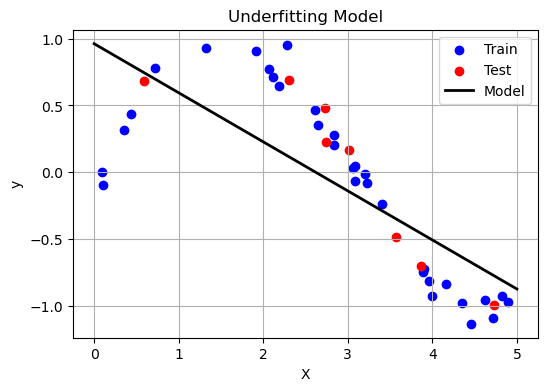

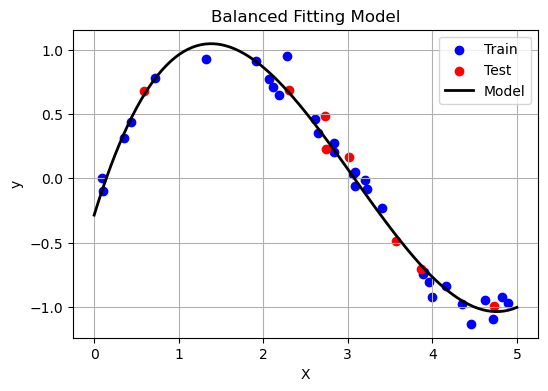

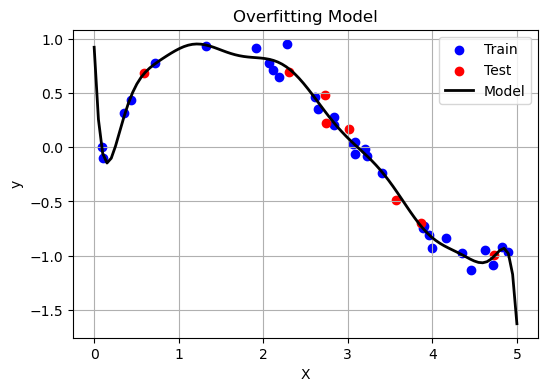

In [87]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

# Məlumatlar (sadə parabolik münasibət)
np.random.seed(0)
X = np.sort(np.random.rand(40, 1) * 5, axis=0)
y = np.sin(X).ravel() + np.random.randn(40) * 0.1  # səs əlavə olunur

# Train / Test ayır
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Underfitting (sade duz xett)
under_model = make_pipeline(PolynomialFeatures(1), LinearRegression())
under_model.fit(X_train, y_train)

# 2. Balanced fitting (orta komplekslik, meselen 3-cu derəce)
balanced_model = make_pipeline(PolynomialFeatures(3), LinearRegression())
balanced_model.fit(X_train, y_train)

# 3. Overfitting (çox kompleks, məsələn 15-ci dərəcə)
over_model = make_pipeline(PolynomialFeatures(15), LinearRegression())
over_model.fit(X_train, y_train)

# 🔍 Vizual olaraq modelleri goster
def plot_model(model, title):
    plt.figure(figsize=(6, 4))
    x_plot = np.linspace(0, 5, 100).reshape(-1, 1)
    y_pred = model.predict(x_plot)

    plt.scatter(X_train, y_train, color='blue', label='Train')
    plt.scatter(X_test, y_test, color='red', label='Test')
    plt.plot(x_plot, y_pred, color='black', linewidth=2, label='Model')
    
    plt.title(title)
    plt.xlabel("X")
    plt.ylabel("y")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_model(under_model, "Underfitting Model")
plot_model(balanced_model, "Balanced Fitting Model")
plot_model(over_model, "Overfitting Model")


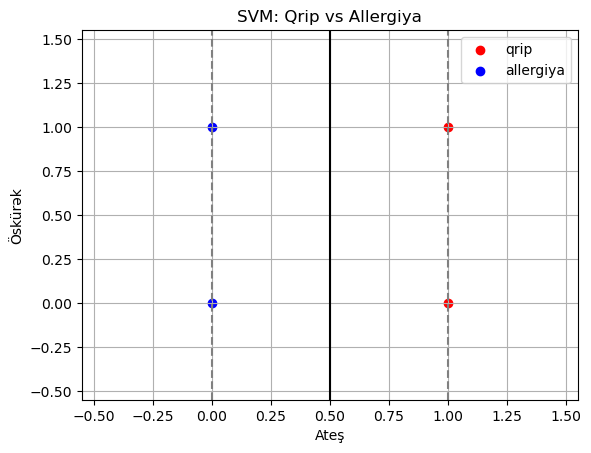

In [21]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import numpy as np

# Sadə verilənlər
X = np.array([[1, 1], [0, 1], [1, 0], [0, 0]])
y = ['qrip', 'allergiya', 'qrip', 'allergiya']

# Klassik SVM
model = SVC(kernel='linear')
model.fit(X, y)

# Vizualizasiya
colors = {'qrip': 'red', 'allergiya': 'blue'}
for i in range(len(X)):
    plt.scatter(X[i][0], X[i][1], color=colors[y[i]], label=y[i] if i < 2 else "")

# Qərar sərhədini çəkək
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Grid yarat
xx = np.linspace(xlim[0]-0.5, xlim[1]+0.5)
yy = np.linspace(ylim[0]-0.5, ylim[1]+0.5)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = model.decision_function(xy).reshape(XX.shape)

# Qərar xətti və marginlər
plt.contour(XX, YY, Z, colors='k', levels=[0], linestyles=['-'])         # qərar xətti
plt.contour(XX, YY, Z, colors='grey', levels=[-1, 1], linestyles=['--']) # marginlər

plt.xlabel("Ateş")
plt.ylabel("Öskürək")
plt.title("SVM: Qrip vs Allergiya")
plt.legend()
plt.grid(True)
plt.show()


## RIDGE, LASSO , ELASTICNET OVERFITTING-IN  QARSISINI ALMAQ UCUN ISTIFADE OLUNUR 

In [4]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [6]:
# Süni bir dataset yaradırıq
np.random.seed(42)

# Xüsusiyyətlər
X = pd.DataFrame({
    'room_count': np.random.randint(1, 5, 100),
    'area': np.random.randint(40, 150, 100),
    'age': np.random.randint(0, 50, 100),
    'noise': np.random.randn(100) * 100  # bu dəyişən təsadüfi, faydasız ola bilər
})

# Qiymət (target)
y = 50000 + (X['room_count'] * 10000) + (X['area'] * 300) - (X['age'] * 500) + np.random.randn(100) * 10000


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=1.0),
    "ElasticNet": ElasticNet(alpha=1.0, l1_ratio=0.5)
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{name} MSE: {mse:.2f}")
    print(f"{name} Coefficients: {model.coef_}\n")


Linear Regression MSE: 117432390.45
Linear Regression Coefficients: [9512.75249883  267.91317873 -512.04660653  -22.79542878]

Ridge MSE: 117493615.91
Ridge Coefficients: [9415.46508228  267.37459525 -511.8203995   -22.78273794]

Lasso MSE: 117433408.80
Lasso Coefficients: [9511.92411135  267.90772249 -512.04021453  -22.79529381]

ElasticNet MSE: 128193854.78
ElasticNet Coefficients: [6730.36536624  252.47830463 -505.23965638  -22.43988598]

